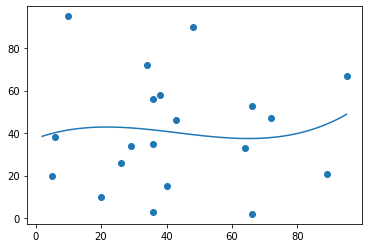

In [1]:
# bad fit 
import numpy as np 
import matplotlib.pyplot as plt 

x = [89, 43, 36, 36, 95, 10, 66, 34, 38, 20, 26, 29, 48, 64, 6, 5, 36, 66, 72, 40]
y = [21, 46, 3, 35, 67, 95, 53, 72, 58, 10, 26, 34, 90, 33, 38, 20, 56, 2, 47, 15]

mymodel =  np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(2, 95, 100)

plt.scatter(x,y)
plt.plot(myline, mymodel(myline))
plt.show()

In [2]:
# R squared for bad fit 
import numpy as np 
from sklearn.metrics import r2_score

x = [89, 43, 36, 36, 95, 10, 66, 34, 38, 20, 26, 29, 48, 64, 6, 5, 36, 66, 72, 40]
y = [21, 46, 3, 35, 67, 95, 53, 72, 58, 10, 26, 34, 90, 33, 38, 20, 56, 2, 47, 15]

model = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, model(x)))

0.009952707566680652


<function matplotlib.pyplot.show(close=None, block=None)>

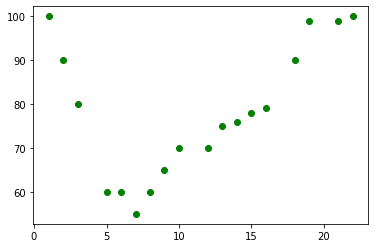

In [3]:
# step1
import matplotlib.pyplot as plt 

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

plt.scatter(x, y, color='green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

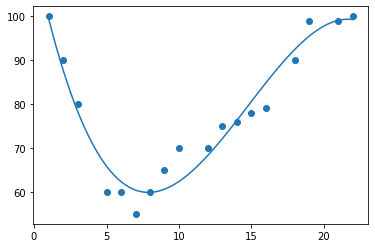

In [4]:
# Draw a line 
import numpy as np 
import matplotlib.pyplot as plt 

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show

In [5]:
# step 3 Rsquared 
import numpy as np 
from sklearn.metrics import r2_score

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


In [6]:
# Prediction 
import numpy as np 
from sklearn.metrics import r2_score

x = [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 21, 22]
y = [100, 90, 80, 60, 60, 55, 60, 65, 70, 70, 75, 76, 78, 79, 90, 99, 99, 100]

mymodel = np.poly1d(np.polyfit(x ,y, 3))

speed = mymodel(18)
print(speed)

92.48673749579994


In [7]:
# Another important Example:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset 
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


In [8]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [9]:
# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

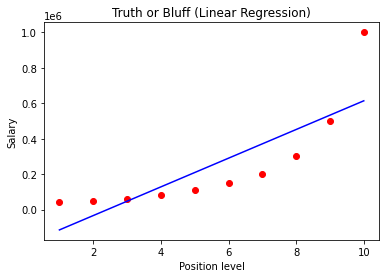

In [11]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

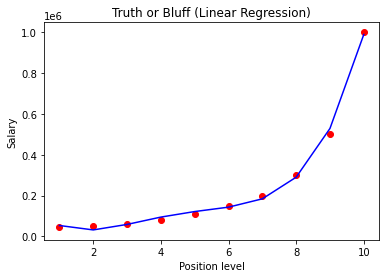

In [12]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()


In [13]:
# Predicting a new result with linear Regression
pred_linear = lin_reg.predict([[11]])

In [14]:
# Predicting a new result with polynomial Regression
pred_polynomial = pol_reg.predict(poly_reg.fit_transform([[11]]))

In [15]:
print("Linear Regression results  = ", pred_linear)
print("Polynomial Regression results =", pred_polynomial)
print("The difference is =", pred_linear - pred_polynomial)

Linear Regression results  =  [694333.33333333]
Polynomial Regression results = [1780833.33333321]
The difference is = [-1086499.99999987]


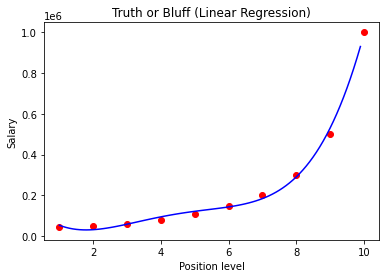

In [16]:
# Additional feature
# Making the plot line (Blue one) more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial_smooth()